In [1]:
from datetime import date
print(date.today())

In [2]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir("data/")

['google-play-store-apps.zip']

In [4]:
from zipfile import ZipFile
#df = pd.read_csv('data/google-play-store-apps.zip') 
# There is multiple files zipped under same file

zip_file = ZipFile('data/google-play-store-apps.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}

print(dfs.keys())

dict_keys(['googleplaystore.csv', 'googleplaystore_user_reviews.csv'])


In [5]:
# make into pd
df_store = pd.DataFrame(dfs.get('googleplaystore.csv'))

df_review = pd.DataFrame(dfs.get('googleplaystore_user_reviews.csv'))

del dfs

In [6]:
print(f"There are {df_store.shape[0]} numbers of Apps and {df_store.shape[1]} number of features in the GP data")
df_store.head()

There are 10841 numbers of Apps and 13 number of features in the GP data


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
print(f"There are {df_review.shape[0]} numbers of reviews and {df_review.shape[1]} number of features in the GP review data")
df_review.head()

There are 64295 numbers of reviews and 5 number of features in the GP review data


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Let's just take a look at the store first

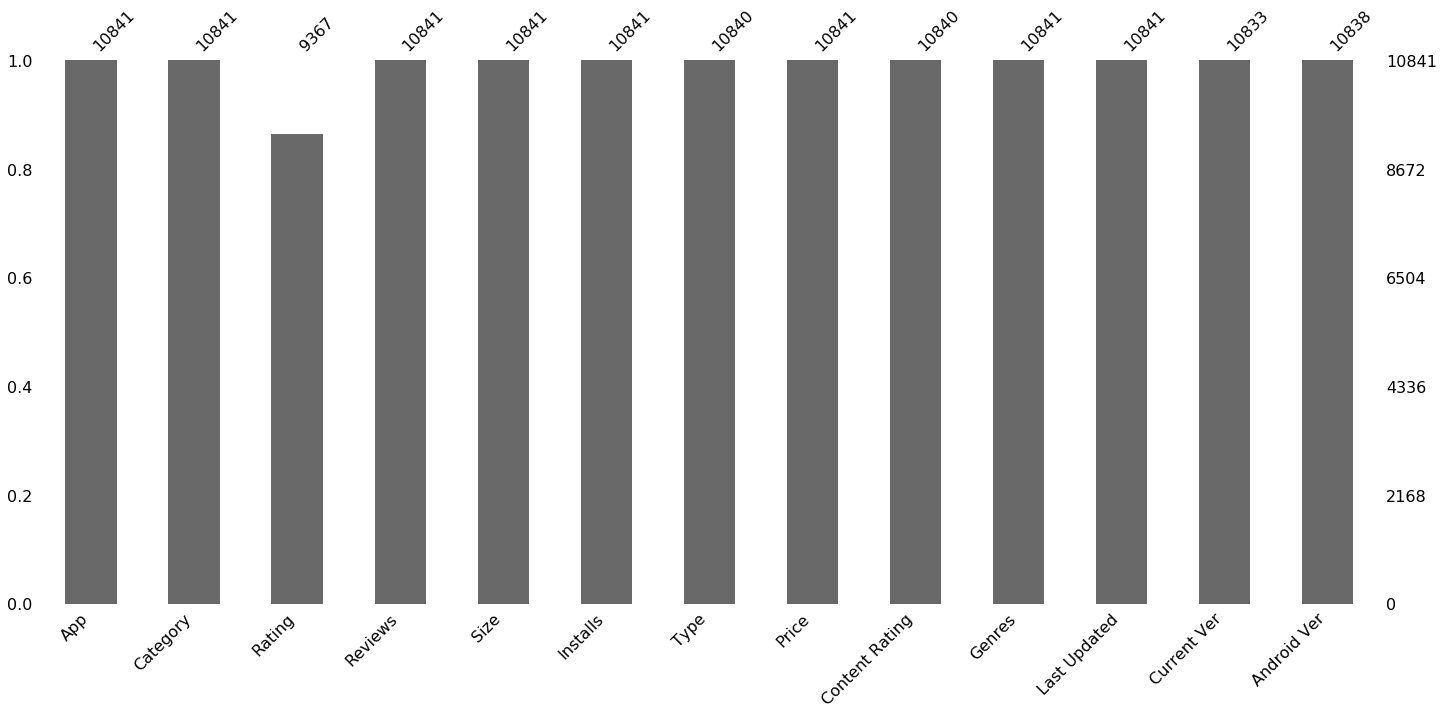

In [8]:
# visualize the missing rate:
fig = plt.figure(figsize= (5,5))
ms.bar(df_store)
plt.show()

In [9]:
# computing the missing rate for each col:
for i in df_store.columns:
    miss_rate = (df_store[i].isna().sum() / df_store.shape[0]) * 100
    if miss_rate > 0: 
        print(f"The missing rate of {i} is : {miss_rate} %")

The missing rate of Rating is : 13.596531685268886 %
The missing rate of Type is : 0.009224241306152568 %
The missing rate of Content Rating is : 0.009224241306152568 %
The missing rate of Current Ver is : 0.07379393044922054 %
The missing rate of Android Ver is : 0.02767272391845771 %


In [10]:
# for this EDA, just simply drop the NA: 
df_store = df_store.dropna(how= 'any')
df_store.isna().sum()
df_store.shape

(9360, 13)

In [11]:
f"There are {df_store.duplicated().sum()} number of duplicated observations. Yet, if i take a close look it does not look duplicates" 

'There are 474 number of duplicated observations. Yet, if i take a close look it does not look duplicates'

In [12]:
df_store.loc[df_store.duplicated(),:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


In [13]:
df_store.loc[:, df_store.dtypes==object].columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

As one can see, there are some columns supposed to be a numerical instead of categorical such as size and installs. Also, Last Updated should be a date type.

In [14]:
# start with date
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])
df_store.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up


In [15]:
df_store['Reviews'] = df_store['Reviews'].astype(int) # fixing reviews

In [16]:
def convert_to_number(x):
    num = 0
    if 'k' in x:
        if len(x) > 1:
            num = float(x.replace('k', '')) * 1000 # convert k to a thousand
    elif 'M' in x:
        if len(x) > 1:
            num = float(x.replace('M', '')) * 1.0e+6 # convert M to a million
    elif 'B' in x: # this is not needed but for future use
        num = float(x.replace('B', '')) * 1.0e+9 # convert B to a Billion
    else:
        num = float(np.nan) # Less than 1000 or Varies with device
    
    return num

In [17]:
# there are M,k and varies with device
df_store['Size'] = df_store['Size'].map(convert_to_number)
#df_store['Size'] = df_store['Size'].astype(int)
# first fill the numerical values and for the varies with device i will just fill the mean values
df_store['Size'].fillna(df_store.groupby(['Category'])['Size'].transform('mean'),inplace = True)

In [18]:
print(f"There are {len(df_store['Installs'].unique())} number of categories for install")
print("\n",df_store['Installs'].unique()) # for install I am ok with being category; however, there are too many categories

There are 19 number of categories for install

 ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+']


In [19]:
tab = df_store['Installs'].value_counts().reset_index(name ='count')
tab = tab.rename(columns = {'Installs' :'count'})
tab['cumsum'] = round(tab['count'] *100 / tab['count'].sum(),2)
tab

,index,count,cumsum
0,"1,000,000+",1576,16.84
1,"10,000,000+",1252,13.38
2,"100,000+",1150,12.29
3,"10,000+",1009,10.78
4,"5,000,000+",752,8.03
5,"1,000+",712,7.61
6,"500,000+",537,5.74
7,"50,000+",466,4.98
8,"5,000+",431,4.60
9,"100,000,000+",409,4.37


In [20]:
# based on the table above, I will cut the chart into Silver (<= 500K (Median)), Gold (<=1M), Plat (<=10M), Diamond(>10M+)
df_store['Installs'] = df_store['Installs'].apply(lambda x:x.strip("+").replace(",",""))
df_store['Installs'] = df_store['Installs'].map(int)
df_store['Installs'].describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [21]:
# i will not use qcut for this time since it only use 25%, 50%, 75% (this will be equal distribution), instead i make my own
cut_labels = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 500000, 1.0e+06, 1.0e+07, 1.000000e+09]
df_store['Installs_group'] = pd.cut(df_store['Installs'], bins=cut_bins, labels=cut_labels)
df_store['Installs_group'].value_counts()

silver      4952
platinum    2004
gold        1576
diamond      828
Name: Installs_group, dtype: int64

In [22]:
df_store['Price'] = df_store['Price'].apply(lambda x:x.replace('$','').replace(',',''))
df_store['Price'] = df_store['Price'].astype(float)
df_store['Price'].value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
3.99        58
1.49        30
2.49        21
5.99        18
9.99        16
6.99        13
399.99      11
14.99       10
4.49         9
3.49         7
7.99         7
29.99        6
12.99        5
19.99        5
24.99        5
11.99        5
8.99         4
10.00        3
16.99        3
5.49         3
79.99        2
7.49         2
33.99        2
10.99        2
1.00         2
          ... 
1.97         1
3.04         1
39.99        1
2.00         1
14.00        1
1.75         1
2.50         1
1.50         1
3.02         1
1.20         1
4.60         1
3.08         1
19.40        1
4.59         1
15.46        1
8.49         1
15.99        1
18.99        1
379.99       1
2.95         1
13.99        1
37.99        1
6.49         1
4.29         1
400.00       1
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [23]:
df_store['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [24]:
w = df_store[df_store['Category'] == '1.9'].index
df_store.loc[w]
df_store = df_store.drop(w)

In [25]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null datetime64[ns]
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Installs_group    9360 non-null category
dtypes: category(1), datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 996.5+ KB


<font color = blue> EDA </font> 

Ratings

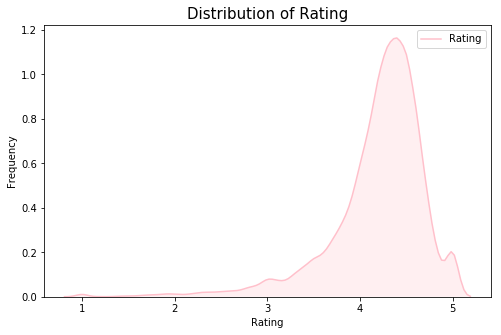

In [26]:
# see how Ratings look like:
fig = plt.figure(figsize= (8,5))
pp= sns.kdeplot(df_store['Rating'], color = 'pink', shade=True) # Probability Density of a continuous variable
pp.set_xlabel("Rating")
pp.set_ylabel('Frequency')
plt.title('Distribution of Rating', size= 15)
plt.show()

In [27]:
f"The average rating is {round(df_store['Rating'].mean(),2)}"

'The average rating is 4.19'

<font color=blue>Most of the apps are rated above 4, this is a bit different from what I thought previously. Previously, I thought that people with either extremely bad or good experience would write out comments or rate. Yet, it turns out to be I was only half right!:) </font> 

Category

In [28]:
f"There are {len(df_store['Category'].unique())} numbers of distinct categories"

'There are 33 numbers of distinct categories'

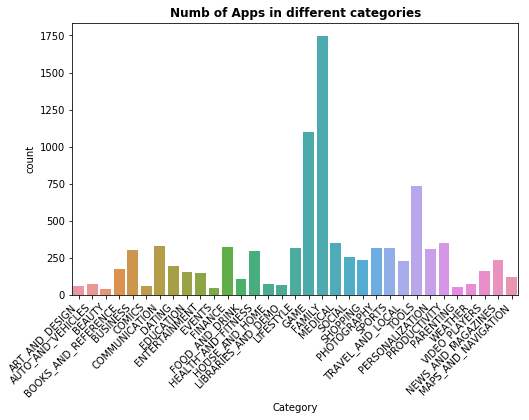

In [29]:
fig = plt.figure(figsize=(8,5))
pp= sns.countplot(data=df_store, x='Category')
pp.set_xticklabels(pp.get_xticklabels(), rotation=45, ha="right")
plt.title("Numb of Apps in different categories",fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Distribution of below AVG apps')

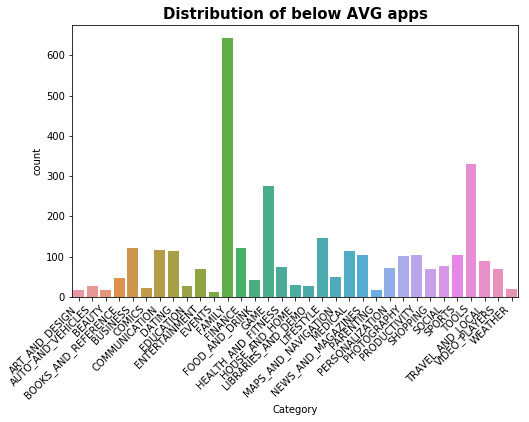

In [30]:
bad_category = df_store[df_store['Rating'] < 4.2].groupby(['Category'])['App'].count().reset_index()
bad_category= bad_category.rename(columns= {'App':'count'})

fig = plt.figure(figsize=(8,5))
pp= sns.barplot(data=bad_category, x= 'Category', y='count')
pp.set_xticklabels(pp.get_xticklabels(), rotation=45, ha="right")
pp.set_title('Distribution of below AVG apps', fontsize=15, fontweight='bold')

In [31]:
a= df_store['Category'].value_counts()
b= df_store[df_store['Rating'] < 4.2]['Category'].value_counts()

compare_tab = pd.concat([a,b],axis = 1)
compare_tab['bad_rates'] = (compare_tab.iloc[:,1]/compare_tab.iloc[:,0])*100
compare_tab = compare_tab.drop(columns = ['Category', 'Category'])
#compare_tab = compare_tab.sort_values(by='bad_rates', ascending= False)
compare_tab

,bad_rates
ART_AND_DESIGN,26.229508
AUTO_AND_VEHICLES,36.986301
BEAUTY,38.095238
BOOKS_AND_REFERENCE,25.842697
BUSINESS,40.264026
COMICS,39.655172
COMMUNICATION,35.670732
DATING,57.948718
EDUCATION,16.774194
ENTERTAINMENT,46.308725


Text(0.5, 1.0, 'Rate of below global AVG, 4.2')

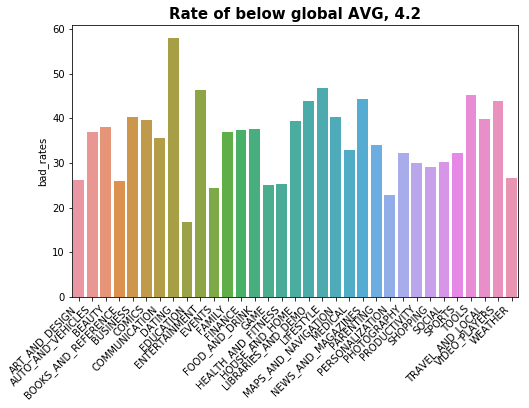

In [32]:
fig = plt.figure(figsize=(8,5))
pp= sns.barplot(data=compare_tab, x= compare_tab.index, y='bad_rates')
pp.set_xticklabels(pp.get_xticklabels(), rotation=45, ha="right")
pp.set_title('Rate of below global AVG, 4.2', fontsize=15, fontweight='bold')

<font color=blue> Majority of the apps are Family, Games, or Tools in this order. In addtiion, **dating** apps are are hard to get above the overall average, 4.2 </font> 

Rating by Category

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

<Figure size 576x360 with 0 Axes>

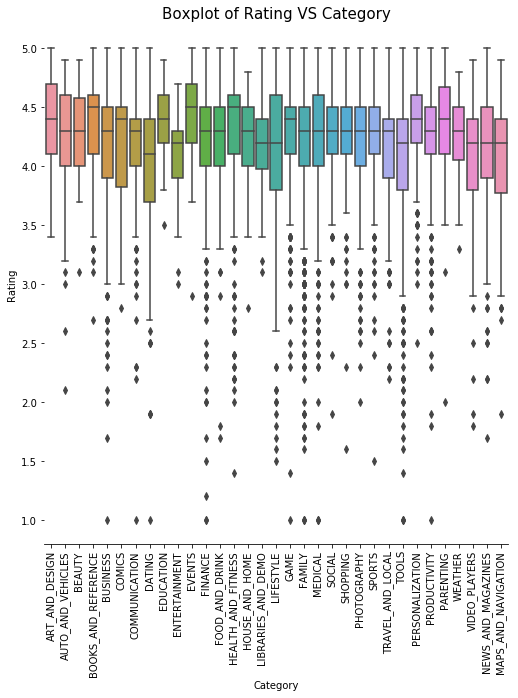

In [33]:
fig = plt.figure(figsize=(8,5))
pp= sns.catplot(data=df_store, x='Category', y='Rating', kind='box', height=8)
pp.despine(left = True)
pp.set_xticklabels(rotation=90)
#pp.set(xticks=range(0,34))
pp = pp.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 15)

Text(0.5, 1.0, 'Boxplot of Size VS Category')

<Figure size 576x360 with 0 Axes>

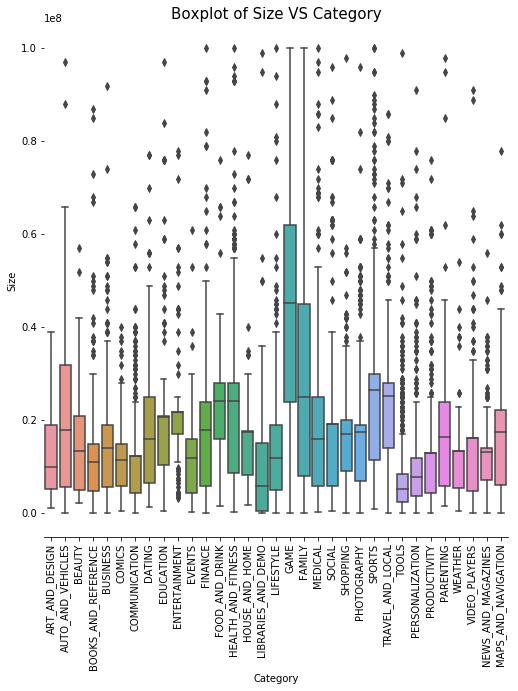

In [34]:
fig = plt.figure(figsize=(8,5))
pp= sns.catplot(data=df_store, x='Category', y='Size', kind='box', height=8)
pp.despine(left = True)
pp.set_xticklabels(rotation=90)
#pp.set(xticks=range(0,34))
pp = pp.set_ylabels("Size")
plt.title('Boxplot of Size VS Category',size = 15)

Besides Game and Family applications, rest of the apps are pretty much the same size. 

Reviews

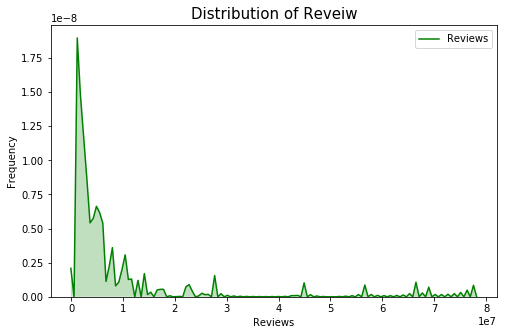

In [35]:
fig = plt.figure(figsize=(8,5))
pp= sns.kdeplot(df_store['Reviews'], color="Green", shade = True)
pp.set_xlabel("Reviews")
pp.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 15)
plt.show()

Many of the app do not have reviews. That makes sense.

In [36]:
fiveM_apps = df_store[df_store['Reviews'] > 5000000][['App', 'Reviews']].sort_values(by= 'Reviews', ascending= False)
top_apps = fiveM_apps['App'].unique()[:10]

f'The most popular apps with reviews are followed: {top_apps}'

"The most popular apps with reviews are followed: ['Facebook' 'WhatsApp Messenger' 'Instagram'\n 'Messenger – Text and Video Chat for Free' 'Clash of Clans'\n 'Clean Master- Space Cleaner & Antivirus' 'Subway Surfers' 'YouTube'\n 'Security Master - Antivirus, VPN, AppLock, Booster' 'Clash Royale']"

Reviews

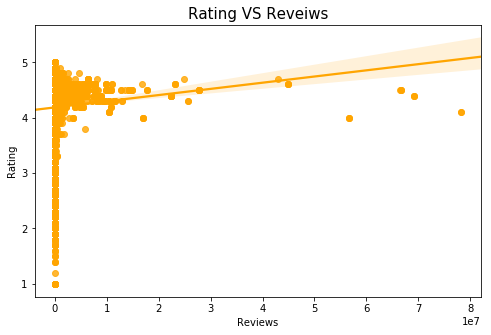

In [37]:
plt.figure(figsize = (8,5))
pp = sns.regplot(x="Reviews", y="Rating",color = 'orange', data=df_store)
plt.title('Rating VS Reveiws',size = 15)
plt.show()

Based on the plot, one could claim that better apps get more reviews. 

Size

<Figure size 576x360 with 0 Axes>

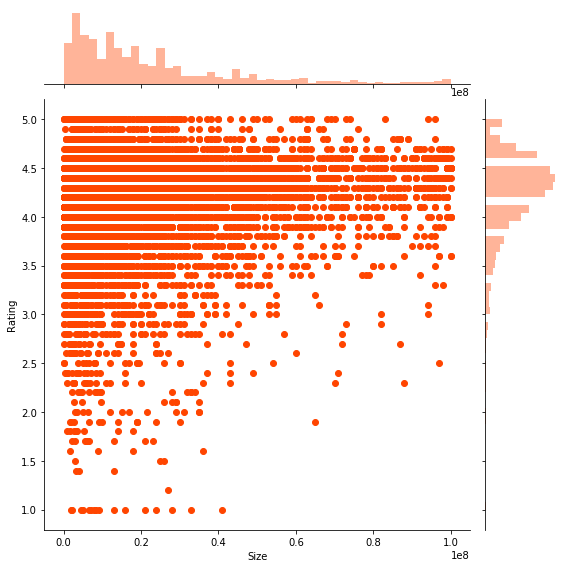

In [38]:
fig = plt.figure(figsize = (8,5))
pp = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=df_store, size = 8)
plt.show()

Similiarly, Size is getting bigger as the ratings get better. Probably, better apps (with better ratings) carries more features?

Install

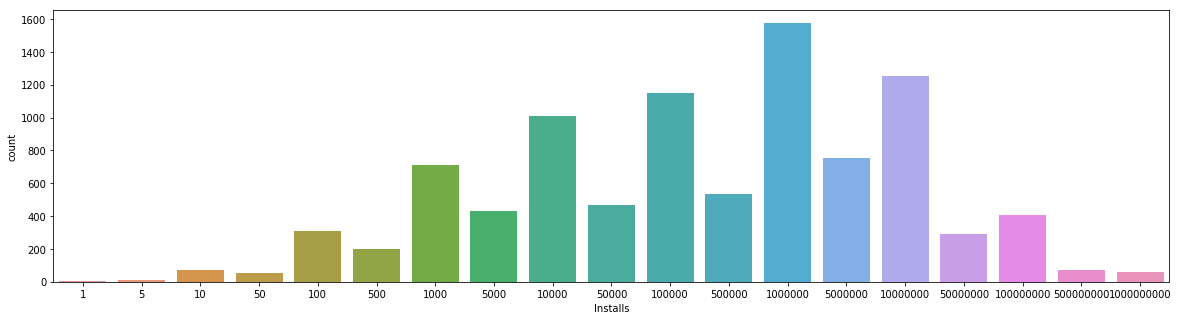

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(df_store['Installs'])

Text(0.5, 1.0, 'Rating VS Installs')

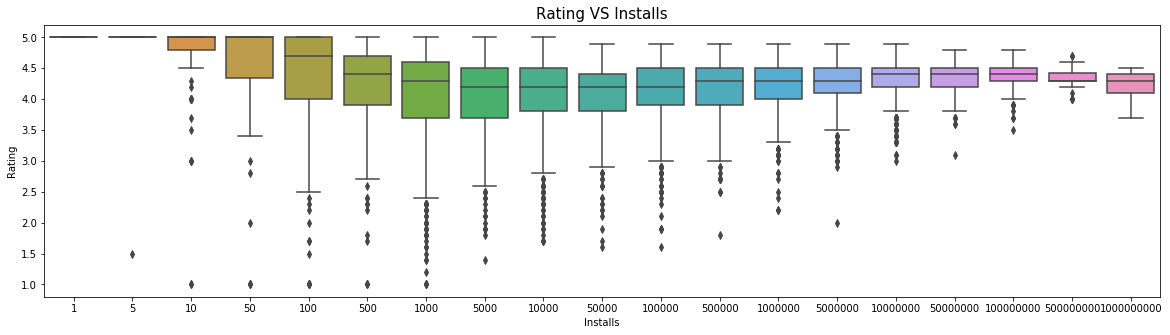

In [40]:
plt.figure(figsize = (20,5))
sns.boxplot(x="Installs", y="Rating",data=df_store);
plt.title('Rating VS Installs',size = 15)

Type

Text(0.5, 1, 'Percent of Free App in store')

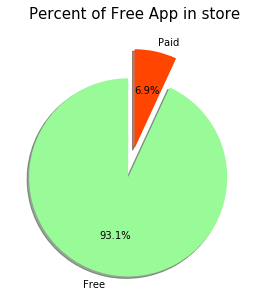

In [41]:
labeles= df_store['Type'].value_counts().index
sizes = df_store['Type'].value_counts().values
explode = (0.3,0)
colors = ["palegreen","orangered"]
plt.pie(sizes, 
       labels=labeles, 
       colors= colors, 
       startangle= 90,
       autopct='%1.1f%%',
       shadow=True,
       explode=explode)

plt.tight_layout()

plt.title('Percent of Free App in store', 
          fontdict=None, 
          position = [0.5,1],
          size = 15
         )

Price

In [42]:
f"The average price of application is : {round(df_store['Price'].mean(),3)} $"

'The average price of application is : 0.961 $'

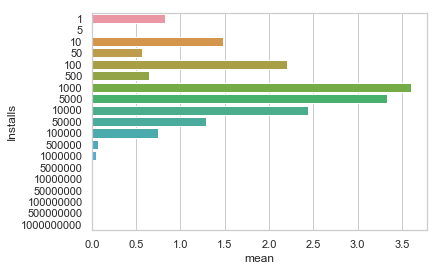

In [43]:
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
tab = df_store.groupby(['Installs'])['Price'].mean().reset_index(name= 'mean')
sns.barplot(data=tab,x='mean',y='Installs',orient='h')

It is counter-intuitive that platinum or diamond application do not charge at all, while silver applications (btw, those ranks were created based on the number of installs (downloads))

Rating by Price

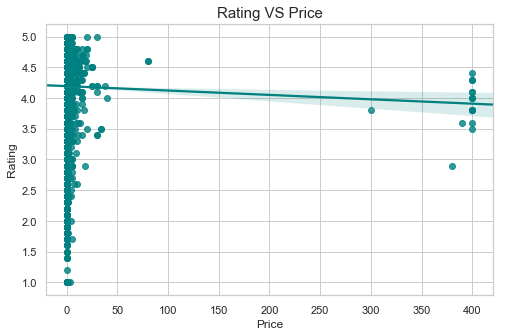

In [44]:
plt.figure(figsize = (8,5))
sns.regplot(x="Price", y="Rating",color = 'teal', data=df_store)
plt.title('Rating VS Price',size = 15)
plt.show()

From the replot, one could say that there is a minor negative relationship between price and rating. It makes sense that if I pay for an app (even a single dime) then my expectation could be much higher than the free ones. 

To make it easy to understand, I make bins for price as I did for the Install.

In [45]:
labels = ['Free', '99c', '$', '<15', '<30', '$$$']
conditions =[(df_store['Price'] == 0),
             ((df_store['Price'] > 0) & (df_store['Price'] <= 0.99)),
             ((df_store['Price'] > 0.99) & (df_store['Price'] <= 9.99)),
             ((df_store['Price'] > 9.99) & (df_store['Price'] <= 14.99)),
             ((df_store['Price'] > 14.99) & (df_store['Price'] <= 29.99)),
             (df_store['Price'] > 29.99)]

df_store['Price_bin'] = np.select(condlist=conditions, choicelist=labels, default=np.nan)
df_store['Price_bin'].value_counts()

Free    8715
$        466
99c      106
<15       27
<30       25
$$$       21
Name: Price_bin, dtype: int64

In [46]:
df_store.groupby(['Price_bin'])[['Price_bin', 'Rating']].mean()

,Rating
Price_bin,
$,4.274249
$$$,3.923810
99c,4.300943
<15,4.285185
<30,4.252000
Free,4.186288


Text(0.5, 1.0, 'Boxen plot Rating VS Price Bins')

<Figure size 576x360 with 0 Axes>

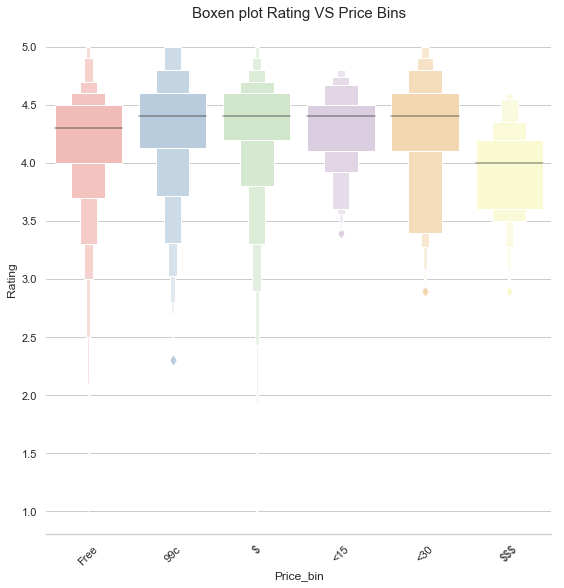

In [47]:
plt.figure(figsize=(8,5))
pp= sns.catplot(x="Price_bin",y="Rating",data=df_store, 
                kind="boxen", height = 8,palette = "Pastel1",
               order=['Free','99c','$','<15','<30','$$$'])
pp.despine(left=True)
pp.set_xticklabels(rotation=45)
pp.set_ylabels("Rating")
plt.title('Boxen plot Rating VS Price Bins',size = 15)

In [48]:
import random #ref: https://www.kaggle.com/tanetboss/how-to-get-high-rating-on-play-storeb

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

flatui = []
for i in range(0,len(df_store['Category'].unique()),1):
    flatui.append(generate_color())

Wall time: 3min 33s


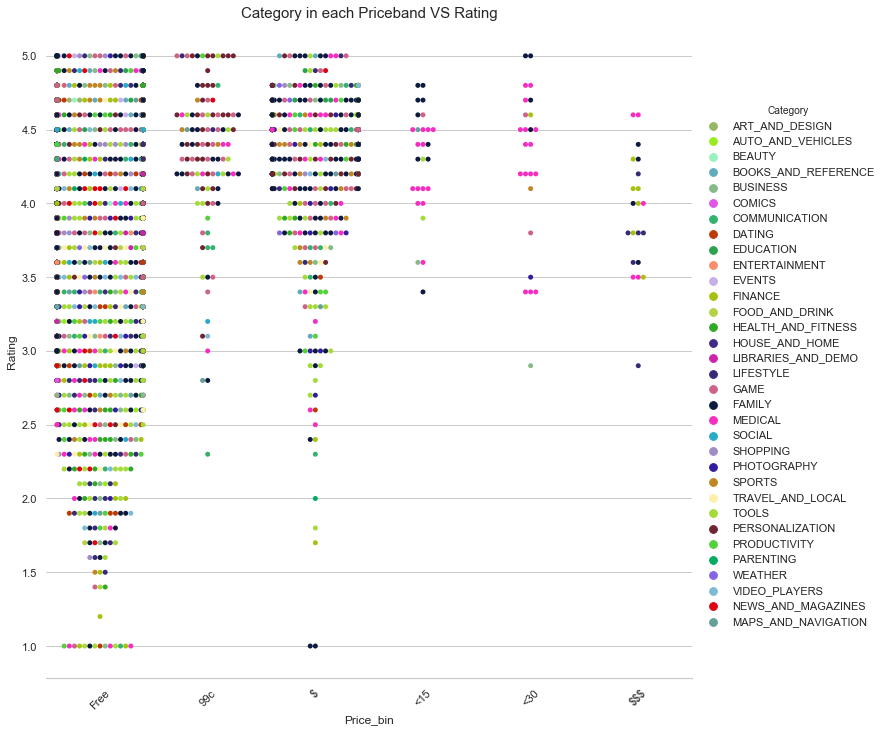

In [49]:
%%time
pp=sns.catplot(x="Price_bin", y="Rating", hue="Category", kind="swarm", 
               data=df_store, palette = flatui, size = 10,
              order=['Free','99c','$','<15','<30','$$$'])
pp.despine(left=True)
pp.set_xticklabels(rotation=45)
plt.title('Category in each Priceband VS Rating',size = 15)    

Genre

In [50]:
f"There are {len(df_store['Genres'].unique())} numbers of genres before regrouping" #hmmm should have clean it much eariler... too dirty!

'There are 115 numbers of genres before regrouping'

In [51]:
# after observing the gerne, it seems the best way to regroup them is split by ';' then take the first half of each
print(f"There are {len(df_store['Genres'].str.split(';').str[0].unique())} numbers of genre now after regrouping!")
genre_list = list(set(df_store['Genres'].str.split(';').str[0]))
num = list(range(0,48))
genre_dic = zip(num, genre_list)
list(genre_dic)

There are 48 numbers of genre now after regrouping!


[(0, 'Casino'),
 (1, 'Medical'),
 (2, 'Food & Drink'),
 (3, 'Communication'),
 (4, 'Shopping'),
 (5, 'Casual'),
 (6, 'Libraries & Demo'),
 (7, 'Adventure'),
 (8, 'Social'),
 (9, 'Lifestyle'),
 (10, 'Auto & Vehicles'),
 (11, 'Strategy'),
 (12, 'Dating'),
 (13, 'Word'),
 (14, 'Photography'),
 (15, 'Books & Reference'),
 (16, 'Trivia'),
 (17, 'Parenting'),
 (18, 'Puzzle'),
 (19, 'Simulation'),
 (20, 'Tools'),
 (21, 'Card'),
 (22, 'Productivity'),
 (23, 'Video Players & Editors'),
 (24, 'Education'),
 (25, 'Finance'),
 (26, 'Role Playing'),
 (27, 'Art & Design'),
 (28, 'House & Home'),
 (29, 'Racing'),
 (30, 'Board'),
 (31, 'Beauty'),
 (32, 'Business'),
 (33, 'Music & Audio'),
 (34, 'Health & Fitness'),
 (35, 'News & Magazines'),
 (36, 'Weather'),
 (37, 'Maps & Navigation'),
 (38, 'Sports'),
 (39, 'Travel & Local'),
 (40, 'Events'),
 (41, 'Personalization'),
 (42, 'Action'),
 (43, 'Entertainment'),
 (44, 'Educational'),
 (45, 'Comics'),
 (46, 'Arcade'),
 (47, 'Music')]

In [52]:
df_store['Genres_regroup'] = df_store['Genres'].str.split(';').str[0]
df_store.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_group,Price_bin,Genres_regroup
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,silver,Free,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,silver,Free,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,platinum,Free,Art & Design


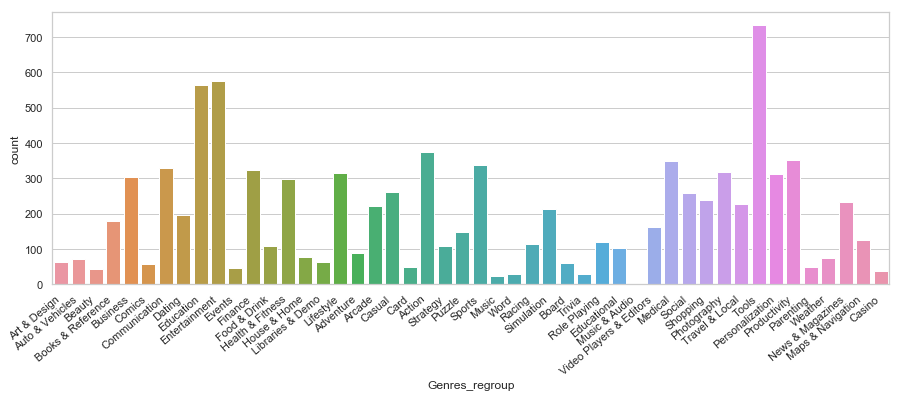

In [53]:
#tab =df_store['Genres_regroup'].value_counts()
plt.figure(figsize=(15,5))
pp=sns.countplot(data=df_store, x='Genres_regroup')
pp.set_xticklabels(pp.get_xticklabels(), rotation=40, ha='right')
plt.show()

Text(0.5, 1.0, 'AVG Rating of Genre')

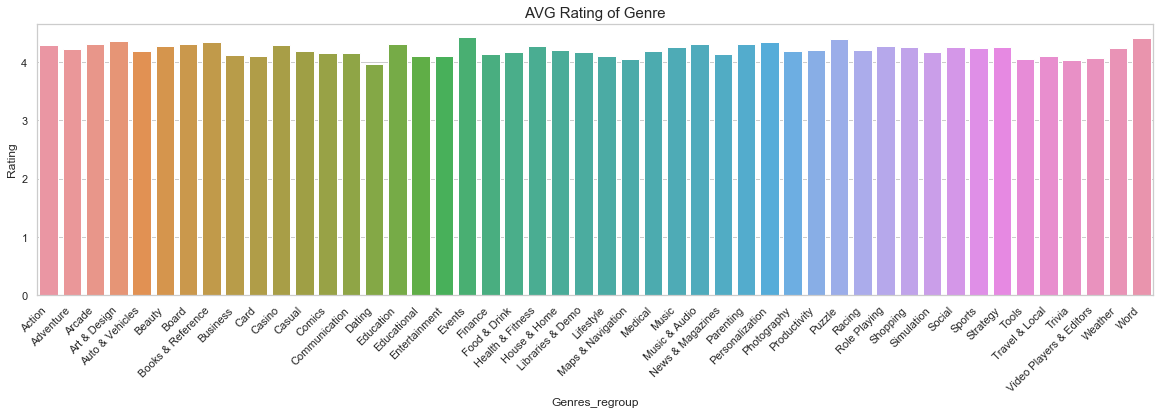

In [54]:
plt.figure(figsize=(20,5))
tab=df_store.groupby('Genres_regroup')[['Genres_regroup', 'Rating']].mean().reset_index('Genres_regroup')
pp=sns.barplot(data=tab, x='Genres_regroup', y='Rating')
pp.set_xticklabels(pp.get_xticklabels(), rotation=45, ha="right")
pp.set_title('AVG Rating of Genre', fontsize=15)

Text(0.5, 1.0, 'Rating VS Genres')

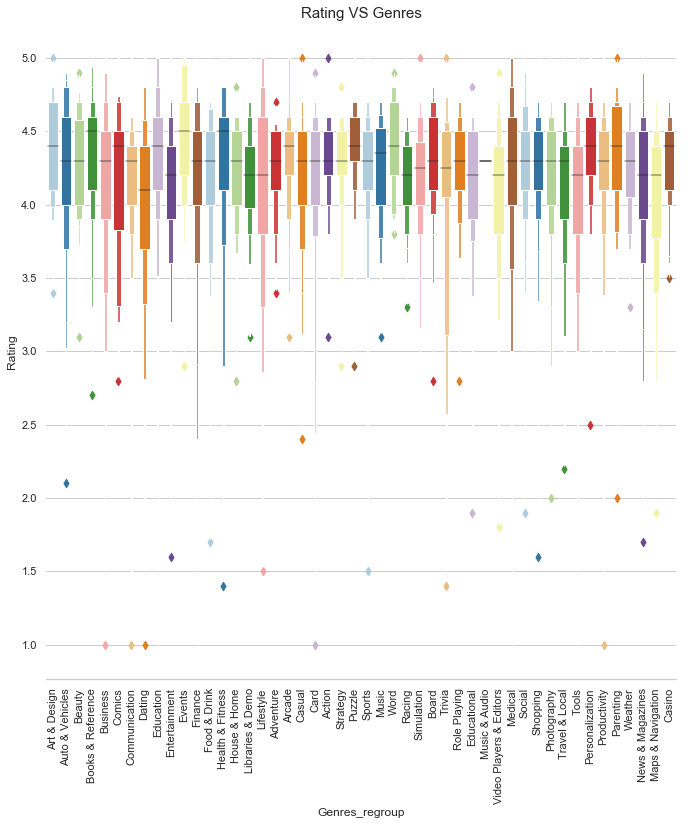

In [55]:
pp=sns.catplot(x="Genres_regroup",y="Rating",data=df_store, kind="boxen", height = 10 ,palette = "Paired")
pp.despine(left=True)
pp.set_xticklabels(rotation=90)
pp.set_ylabels("Rating")
plt.title('Rating VS Genres',size = 15)

In [56]:
df_store.groupby(['Genres_regroup'])[['Genres_regroup','Rating']].mean().describe()

,Rating
count,48.000000
mean,4.212486
std,0.104071
min,3.970769
25%,4.132114
50%,4.204821
75%,4.286532
max,4.435556


Based on the Standard Deviation of mean rating for regrouped genre and the barplot of it, seem like genre is not effect too much to rating.
The lowest of an average rating on genres is 3.97, while the highest is 4.43

Last Updated

In [57]:
df_store['Last Updated'].describe()

count                    9360
unique                   1299
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [58]:
import datetime as dt
df_store['updated_year'] = df_store['Last Updated'].apply(lambda x:x.year)
df_store['updated_month'] = df_store['Last Updated'].dt.month

<Figure size 576x360 with 0 Axes>

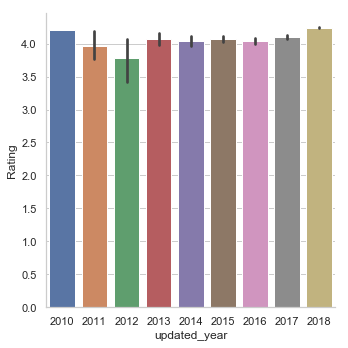

In [59]:
sns.catplot#(x="Genres_regroup",y="Rating",data=df_store, kind="boxen", height = 10 ,palette = "Paired")
plt.figure(figsize=(8,5))
sns.catplot(x='updated_year',y='Rating',data=df_store, kind='bar')

Seems like as the ratings goes by upto 2012 and started going back up !

<Figure size 576x360 with 0 Axes>

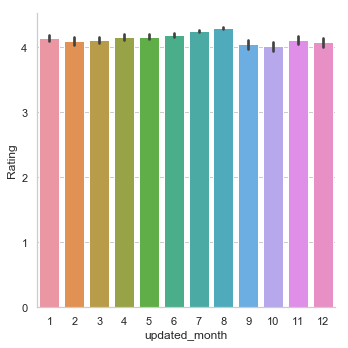

In [60]:
plt.figure(figsize=(8,5))
sns.catplot(x='updated_month',y='Rating',data=df_store, kind='bar')

Seems like the ratings are going down from September and going back up in January. 

In [61]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 18 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null datetime64[ns]
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Installs_group    9360 non-null category
Price_bin         9360 non-null object
Genres_regroup    9360 non-null object
updated_year      9360 non-null int64
updated_month     9360 non-null int64
dtypes: category(1), datetime64[ns](1), float64(3), int32(1), int64(3), object(9)
memory usage: 1.6+ MB


Machine Learning

convert categorical variables (variables that stored as text values) into numircal variables.

In [62]:
df = df_store.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_group,Price_bin,Genres_regroup,updated_year,updated_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,silver,Free,Art & Design,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,silver,Free,Art & Design,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,platinum,Free,Art & Design,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,diamond,Free,Art & Design,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,silver,Free,Art & Design,2018,6


In [63]:
import re
temp=df['Current Ver'].replace(np.nan,'Varies with device')
temp=temp.apply(lambda x: '0.0' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0] )

df['Current Ver_new'] = temp
len(df['Current Ver_new'].unique())

111

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['App'] = le.fit_transform(df['App'])
len(df['App'].unique())

8190

In [65]:
cat_list = df['Category'].unique().tolist()
cat_list = ['cat_' + x for x in cat_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis = 1)
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,5805,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,2134,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,7321,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df['Genres_regroup'] = le.fit_transform(df['Genres'])
df['Genres_regroup'].value_counts()

105    732
50     533
37     468
0      358
80     351
69     350
99     333
34     328
58     323
79     317
65     313
78     312
20     303
60     297
98     259
93     238
73     233
107    225
6      207
36     195
94     194
25     185
18     178
110    158
68     124
81     120
59     109
89     106
101    103
86      93
      ... 
53       3
56       2
111      2
11       2
19       2
102      2
30       2
22       2
84       2
5        2
66       1
71       1
8        1
23       1
62       1
54       1
85       1
61       1
104      1
88       1
106      1
108      1
4        1
17       1
103      1
33       1
91       1
75       1
35       1
67       1
Name: Genres_regroup, Length: 115, dtype: int64

In [67]:
df['Installs'] = le.fit_transform(df['Installs'])
df['Installs'].value_counts()

12    1576
14    1252
10    1150
8     1009
13     752
6      712
11     537
9      466
7      431
16     409
4      309
15     289
5      201
17      72
2       69
18      58
3       56
1        9
0        3
Name: Installs, dtype: int64

In [68]:
df['Type'] = pd.get_dummies(df['Type']) # by doing this i will not make any additional columns but switching to 1 or 0 
df['Type'].value_counts()

1    8715
0     645
Name: Type, dtype: int64

In [69]:
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df['Content Rating'].value_counts()

1    7414
4    1084
3     461
2     397
0       3
5       1
Name: Content Rating, dtype: int64

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Size'].describe()

df['Size_norm'] = sc.fit_transform(df['Size'].values.reshape(-1, 1))
df['Size_norm'].describe()

count    9.360000e+03
mean     1.089110e-16
std      1.000053e+00
min     -1.037810e+00
25%     -7.336034e-01
50%     -2.997814e-01
75%      3.463364e-01
max      3.576926e+00
Name: Size_norm, dtype: float64

In [71]:
df['Installs_norm'] = sc.fit_transform(df['Installs'].values.reshape(-1,1))
df['Installs_norm'].describe()

count    9.360000e+03
mean    -3.158917e-15
std      1.000053e+00
min     -3.169851e+00
25%     -7.694056e-01
50%      1.307614e-01
75%      7.308728e-01
max      2.231151e+00
Name: Installs_norm, dtype: float64

In [72]:
df['price_norm'] = sc.fit_transform(df['Price'].values.reshape(-1,1))
df['price_norm'].describe()

count    9.360000e+03
mean    -2.824386e-15
std      1.000053e+00
min     -6.076046e-02
25%     -6.076046e-02
50%     -6.076046e-02
75%     -6.076046e-02
max      2.522242e+01
Name: price_norm, dtype: float64

Selecting features!

In [74]:
features = ['App', 'Reviews', 'Size_norm', 'Installs_norm', 'Type', 'price_norm', 'Content Rating', 'Genres_regroup', 'Current Ver_new']
features.extend(cat_list)
features

['App',
 'Reviews',
 'Size_norm',
 'Installs_norm',
 'Type',
 'price_norm',
 'Content Rating',
 'Genres_regroup',
 'Current Ver_new',
 'cat_ART_AND_DESIGN',
 'cat_AUTO_AND_VEHICLES',
 'cat_BEAUTY',
 'cat_BOOKS_AND_REFERENCE',
 'cat_BUSINESS',
 'cat_COMICS',
 'cat_COMMUNICATION',
 'cat_DATING',
 'cat_EDUCATION',
 'cat_ENTERTAINMENT',
 'cat_EVENTS',
 'cat_FINANCE',
 'cat_FOOD_AND_DRINK',
 'cat_HEALTH_AND_FITNESS',
 'cat_HOUSE_AND_HOME',
 'cat_LIBRARIES_AND_DEMO',
 'cat_LIFESTYLE',
 'cat_GAME',
 'cat_FAMILY',
 'cat_MEDICAL',
 'cat_SOCIAL',
 'cat_SHOPPING',
 'cat_PHOTOGRAPHY',
 'cat_SPORTS',
 'cat_TRAVEL_AND_LOCAL',
 'cat_TOOLS',
 'cat_PERSONALIZATION',
 'cat_PRODUCTIVITY',
 'cat_PARENTING',
 'cat_WEATHER',
 'cat_VIDEO_PLAYERS',
 'cat_NEWS_AND_MAGAZINES',
 'cat_MAPS_AND_NAVIGATION']

In [75]:
x = df[features]
y = df['Rating']

Train/test split

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [79]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors= 15)
knn.fit(x_train, y_train)

ValueError: could not convert string to float: 

In [ ]:
accuracy = knn.score(x_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

In [ ]:
n_neighbors = np.arange(1, 100, 1)
scores = []
for n in n_neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)